STEP 1 — Import libraries + load cleaned CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("final.csv")

df
df.shape

(414363, 23)

STEP 2 — Basic description

In [2]:

df.info()
df.describe().T
df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414363 entries, 0 to 414362
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         414363 non-null  object 
 1   region_url     414363 non-null  object 
 2   price          414363 non-null  int64  
 3   year           414363 non-null  float64
 4   manufacturer   414363 non-null  object 
 5   model          414363 non-null  object 
 6   condition      414363 non-null  object 
 7   cylinders      414363 non-null  float64
 8   fuel           414363 non-null  object 
 9   odometer       414363 non-null  float64
 10  title_status   414363 non-null  object 
 11  transmission   414363 non-null  object 
 12  drive          414363 non-null  object 
 13  size           414363 non-null  object 
 14  type           414363 non-null  object 
 15  paint_color    414363 non-null  object 
 16  state          414363 non-null  object 
 17  lat            414363 non-nul

posting_month    68
posting_day      68
posting_date     68
posting_year     68
region            0
region_url        0
price             0
condition         0
model             0
manufacturer      0
year              0
cylinders         0
fuel              0
odometer          0
title_status      0
type              0
size              0
drive             0
transmission      0
long              0
dtype: int64

STEP 3 — Price Distribution

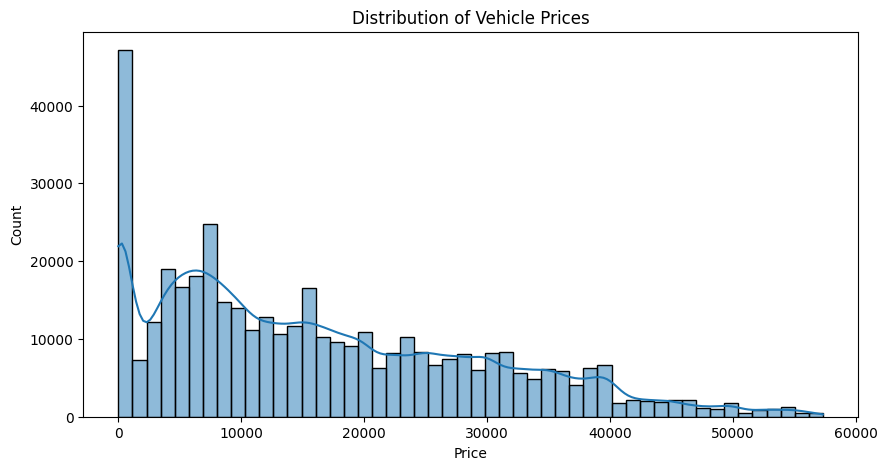

In [3]:

plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Vehicle Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

STEP 4 — Odometer Distribution

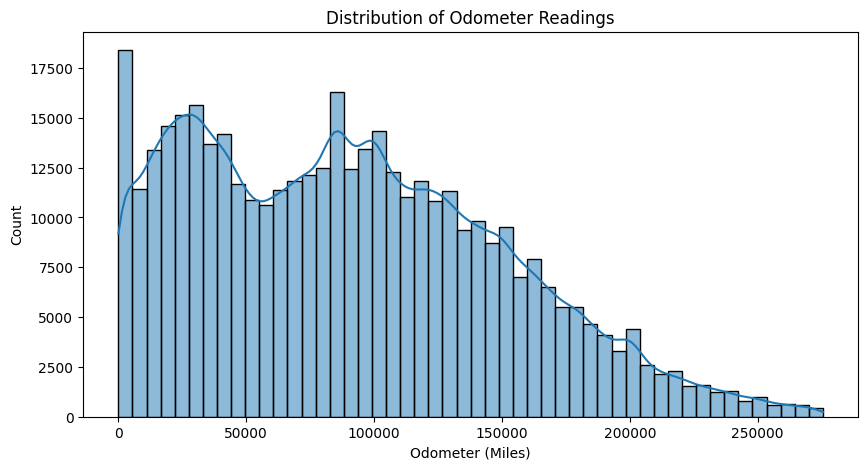

In [4]:

plt.figure(figsize=(10,5))
sns.histplot(df["odometer"], bins=50, kde=True)
plt.title("Distribution of Odometer Readings")
plt.xlabel("Odometer (Miles)")
plt.ylabel("Count")
plt.show()

STEP 5 — Scatter Plot: Price vs Odometer

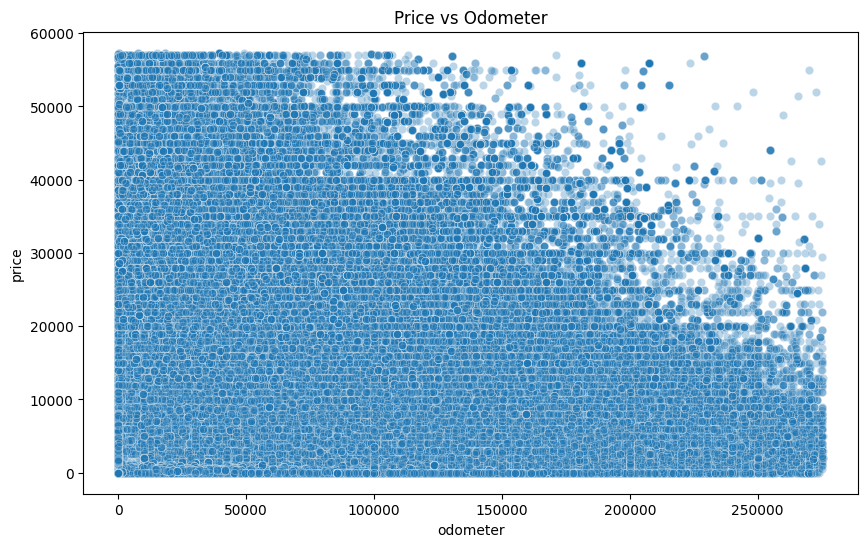

In [5]:

plt.figure(figsize=(10,6))
sns.scatterplot(x="odometer", y="price", data=df, alpha=0.3)
plt.title("Price vs Odometer")
plt.show()

STEP 6 — Correlation Matrix (Numeric Columns)

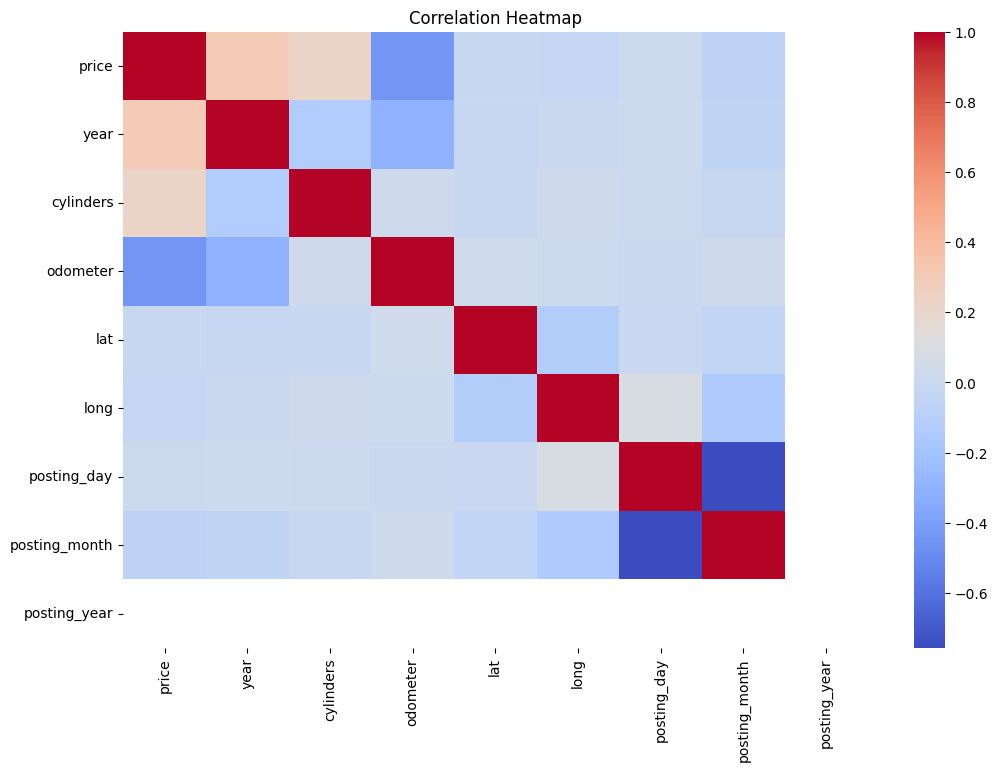

In [6]:

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

STEP 7 — Average Price by Manufacturer (Top 15)

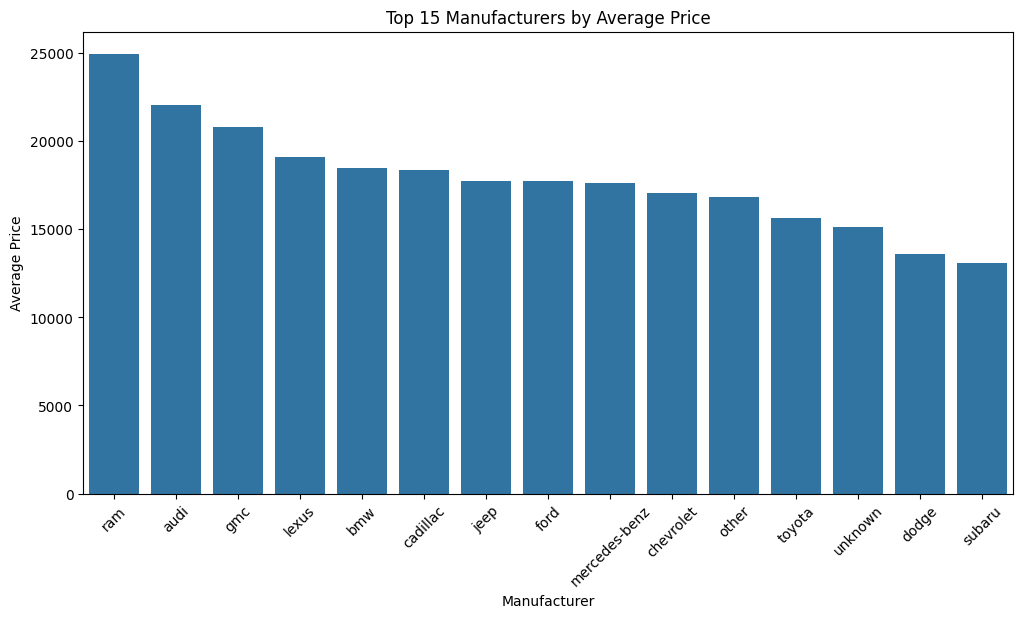

In [7]:

plt.figure(figsize=(12,6))
top_price_makers = df.groupby("manufacturer")["price"].mean().nlargest(15)

sns.barplot(x=top_price_makers.index, y=top_price_makers.values)
plt.xticks(rotation=45)
plt.title("Top 15 Manufacturers by Average Price")
plt.xlabel("Manufacturer")
plt.ylabel("Average Price")
plt.show()

STEP 8 — Count of Cars by Type

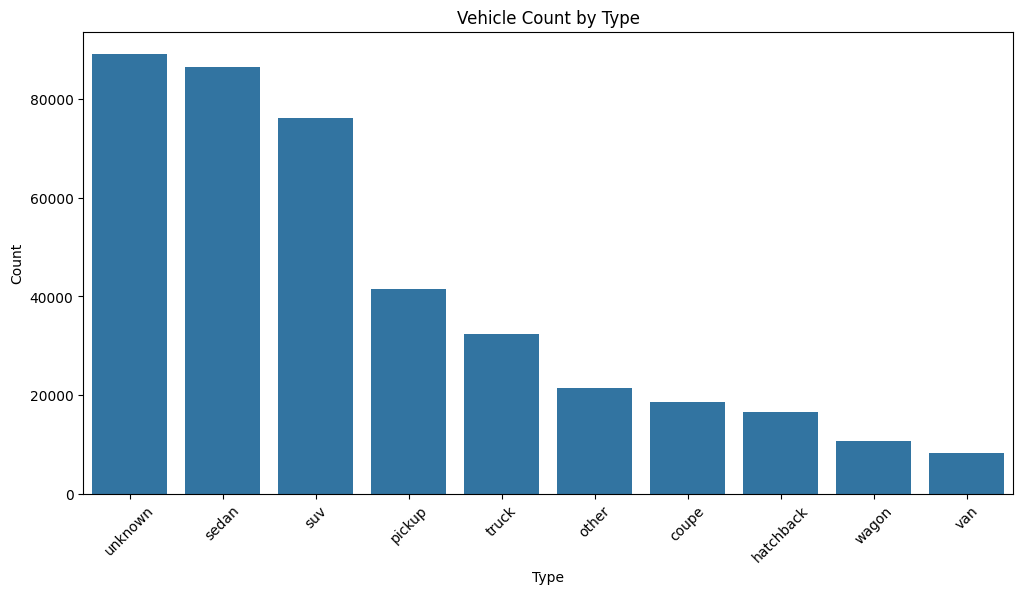

In [8]:

plt.figure(figsize=(12,6))
type_counts = df["type"].value_counts().head(10)

sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xticks(rotation=45)
plt.title("Vehicle Count by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

STEP 9 — Paint Color Distribution (Top 10)

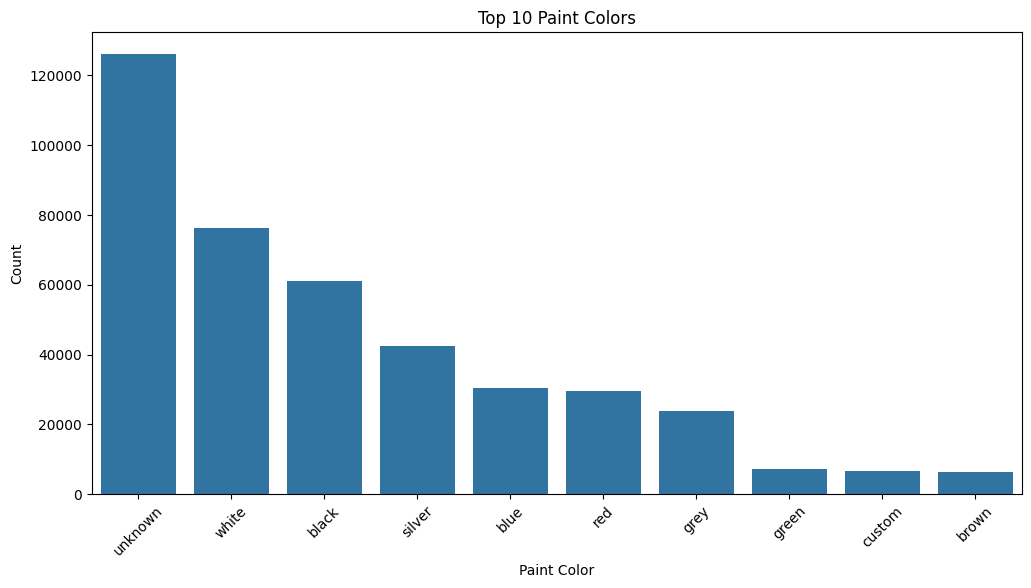

In [9]:

plt.figure(figsize=(12,6))
paint_counts = df["paint_color"].value_counts().head(10)

sns.barplot(x=paint_counts.index, y=paint_counts.values)
plt.xticks(rotation=45)
plt.title("Top 10 Paint Colors")
plt.xlabel("Paint Color")
plt.ylabel("Count")
plt.show()

STEP 10 — Price by Condition

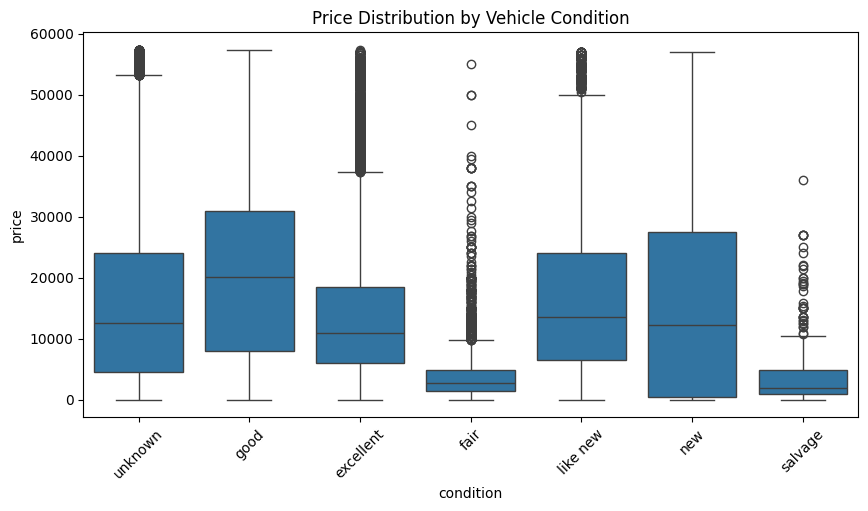

In [10]:

plt.figure(figsize=(10,5))
sns.boxplot(x="condition", y="price", data=df)
plt.title("Price Distribution by Vehicle Condition")
plt.xticks(rotation=45)
plt.show()

STEP 11 — Price by Fuel Type

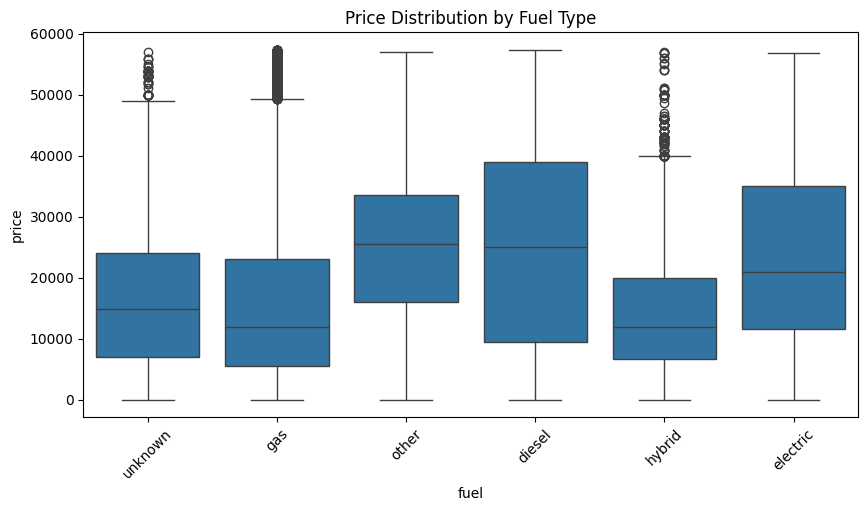

In [12]:

plt.figure(figsize=(10,5))
sns.boxplot(x="fuel", y="price", data=df)
plt.title("Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()